<a href="https://colab.research.google.com/github/VielF/ColabProjects/blob/main/Pr%C3%A1tica_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Engenharia de Computação - Processamento Digital de Sinais: Imagens

# Exercício Avalitivo de Redes Neurais Convolucionais

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/
- https://www.tensorflow.org/learn?hl=pt-br   

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [ ]:
#abria a imagem
img = cv2.imread('data/t1.jpg',1)
#cv2_imshow(img)

In [ ]:
#mostrando a imagem colorida
cv2.imshow('in', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#aplicando conversão básica
#numpy
#img_grayscale_basic = (img[ : , : ,0]+img[ : , : ,1]+img[ : , : ,2])/3

#cv2
B, G, R = cv2.split(img)
img_grayscale_basic = (B+G+R)/3

img_grayscale_basic = np.array(img_grayscale_basic, dtype=np.uint8)

cv2.imshow('img_grayscale_basic', img_grayscale_basic)
cv2.waitKey(0)
cv2.destroyAllWindows()

## CNN


### Dataset

1. Faça o download do dataset:
  - Opção 1: https://www.tensorflow.org/datasets/catalog/cifar10_corrupted?hl=pt-br (uma das opções de corrompimento).
  - Opção 2: https://www.tensorflow.org/datasets/catalog/rock_paper_scissors?hl=pt-br.
  - Opção 3: https://www.tensorflow.org/datasets/catalog/beans?hl=pt-br
  - Opção 4: https://www.tensorflow.org/datasets/catalog/malaria?hl=pt-br
  - Opção 5: https://www.tensorflow.org/datasets/catalog/eurosat?hl=pt-br
2. Adicione ruído do tipo salt and pepper, branco ou gaussino. Caso escolha a Opção 1, não é necessário aplicar ruído.
3. Dimensione o dataset para uma quantidade adequada de imagens que seja possível treinar e testar (principalmente se você usa o Colab free). Porém, cuidado com um quantidade muito pequena que não possibilite uma boa generalização de amostras.
4. Faça o split do dataset em uma quantidade adequada para treinamento, validação e teste. É extremamente desejavel um nível bom de aleatoriedade ao fazer o split dos dados.


In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import numpy as np


In [8]:
(ds_train, ds_test), ds_info = tfds.load('rock_paper_scissors', split=["train", "test"], as_supervised=True, with_info=True)

num_classes = ds_info.features['label'].num_classes
print(num_classes)
num_names = ds_info.features['label'].names
print(num_names)

IMG_SIZE = 64
NOISE_STD = 10

def add_gaussian_noise_uint8(img_uint8, std=25.0):
    noise = np.random.normal(0, std, img_uint8.shape).astype(np.float32)
    noisy = img_uint8.astype(np.float32) + noise
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

def preprocess_image_np(img_np, add_noise=True):
    img_resized = cv2.resize(img_np, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
    img_uint8 = img_resized.astype(np.uint8)
    if add_noise:
        img_uint8 = add_gaussian_noise_uint8(img_uint8, std=NOISE_STD)
    img_float = img_uint8.astype(np.float32) / 255.0
    return img_float

X_dataset = []
y_dataset = []

for img, label in tfds.as_numpy(ds_train):
    X_dataset.append(preprocess_image_np(img, add_noise=True))
    y_dataset.append(int(label))

X_dataset = np.stack(X_dataset, axis=0)
y_dataset = np.array(y_dataset, dtype=np.int64)

print(X_dataset.shape)
print(y_dataset.shape)

num_samples = X_dataset.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)


val_ratio = 0.2
val_size = int(num_samples * val_ratio)

val_idx = indices[:val_size]
train_idx = indices[val_size:]

X_val = X_dataset[val_idx]
y_val = y_dataset[val_idx]
X_train = X_dataset[train_idx]
y_train = y_dataset[train_idx]

X_test = []
y_test = []

for img, label in tfds.as_numpy(ds_test):
    X_test.append(preprocess_image_np(img, add_noise=True))
    y_test.append(int(label))

X_test = np.stack(X_test, axis=0)
y_test = np.array(y_test, dtype=np.int64)

print("Treinamento: ", X_train.shape, y_train.shape)
print("Validação: ", X_val.shape, y_val.shape)
print("Teste: ", X_test.shape, y_test.shape)

3
['rock', 'paper', 'scissors']
(2520, 64, 64, 3)
(2520,)
Treinamento:  (2016, 64, 64, 3) (2016,)
Validação:  (504, 64, 64, 3) (504,)
Teste:  (372, 64, 64, 3) (372,)


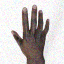

In [10]:
sample_img = (X_train[0] * 255).astype(np.uint8)
sample_img_bgr = cv2.cvtColor(sample_img, cv2.COLOR_RGB2BGR)

cv2_imshow(sample_img_bgr)

### Fluxo de Algoritmos

1. Pré-processamento: Com o dataset carregado, avalie as imagens (estado, ruído, informação contida) e adicione algoritmos vistos em aula (operações pontuais, filtragem, morfologia) e pré-processe as imagens para treinamento e predição (com o conjunto de testes). Lembre-se de aplicar o fluxo em todas as imagens.
  - Você deve aplicar pelo menos um algoritmo de filtragem espacial. A sua avaliação indicará qual é necessário.
  - Você deve aplicar pelo menos um algoritmo de operação pontual e/ou morfologia. Lembre-se que a sua avaliação indicará qual é necessário.

2. Processamento: Proponha uma arquitetura de CNN para classificar as imagens geradas pelo pré-processamento. Apresente a arquitetura proposta, acurácia e loss (perda) (treinamento, validação e teste) e quantidade de parâmentros da rede. Faça uma análise do resultados e do fluxo utilizado. Quais as suas conclusões?

In [11]:
from tensorflow.keras import layers, models, callbacks

In [28]:
input_shape = X_test.shape[1:]

model = models.Sequential()
model.add(layers.Input(shape=input_shape))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,195 (813.26 KB)

 Trainable params: 208,195 (813.26 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(X_train,y_train, epochs=5, validation_data=(X_val, y_val), batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.4344 - loss: 1.0494 - val_accuracy: 0.7956 - val_loss: 0.5513
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8557 - loss: 0.4097 - val_accuracy: 0.9921 - val_loss: 0.0462
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9820 - loss: 0.0829 - val_accuracy: 1.0000 - val_loss: 0.0116
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9919 - loss: 0.0281 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9978 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0030


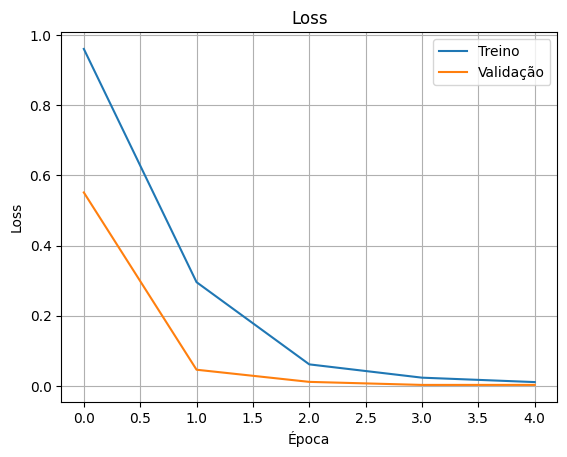

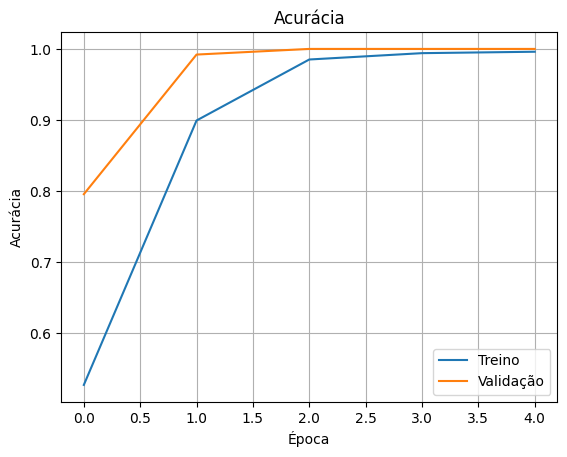

In [32]:
def plot_history(history):
    # Loss
    plt.figure()
    plt.plot(history.history["loss"], label="Treino")
    plt.plot(history.history["val_loss"], label="Validação")
    plt.title("Loss")
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Acurácia
    if "accuracy" in history.history:
        plt.figure()
        plt.plot(history.history["accuracy"], label="Treino")
        plt.plot(history.history["val_accuracy"], label="Validação")
        plt.title("Acurácia")
        plt.xlabel("Época")
        plt.ylabel("Acurácia")
        plt.legend()
        plt.grid(True)
        plt.show()

plot_history(history)

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.9594 - loss: 0.1164
0.9516128897666931


Matriz de confusão:
[[115   4   5]
 [  0 121   3]
 [  0   6 118]]

Relatório de classificação:
              precision    recall  f1-score   support

        rock       1.00      0.93      0.96       124
       paper       0.92      0.98      0.95       124
    scissors       0.94      0.95      0.94       124

    accuracy                           0.95       372
   macro avg       0.95      0.95      0.95       372
weighted avg       0.95      0.95      0.95       372



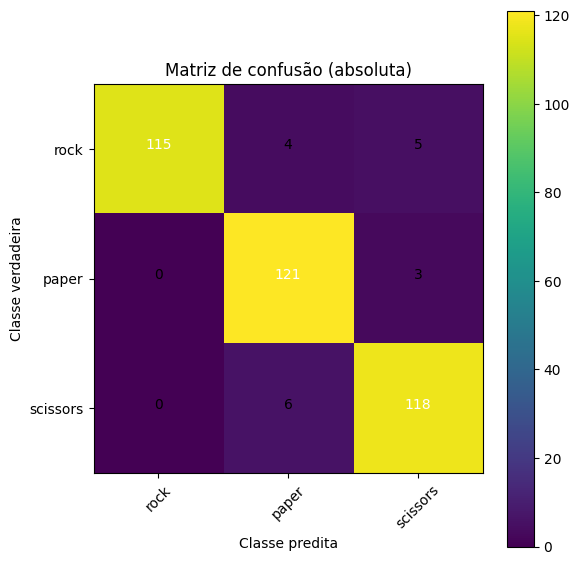

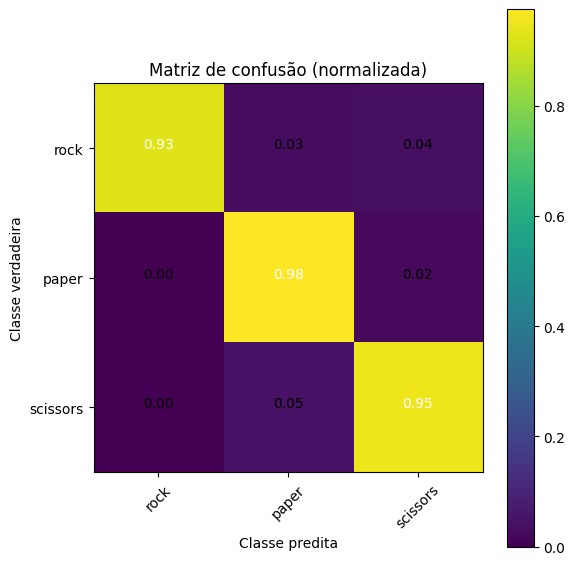

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)

print("Matriz de confusão:")
print(cm)

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred, target_names=num_names))

def plot_confusion_matrix(cm, classes, normalize=False, title="Matriz de confusão"):
    if normalize:
        cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    else:
        cm_norm = cm

    plt.figure(figsize=(6, 6))
    plt.imshow(cm_norm, interpolation="nearest")
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm_norm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm_norm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm_norm[i, j] > thresh else "black",
        )

    plt.ylabel("Classe verdadeira")
    plt.xlabel("Classe predita")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, num_names, normalize=False, title="Matriz de confusão (absoluta)")
plot_confusion_matrix(cm, num_names, normalize=True, title="Matriz de confusão (normalizada)")


## Melhorias

1. Propanha alterações no fluxo de pré-processamento e processamento: inserção ou retirada de algoritmos, aumento/diminuição da arquiteura proposta, tunning de hiperparâmetros, data augmentation, etc. Você pode adicionar técnicas além das citadas em aula.

2. Houve melhoria da acurácia? Procure outra métrica da literatura e aplique para avaliar o quão bom é a classificação. Os resultados apresentados pelas duas métricas é ruim/satisfatório/bom/ótimo? Comente e análise os seus resutaldos.

## (OPCIONAL)

1. Apresente as características importantes extraídas pelas camadas/CNN e aplique alguma pós-processamento (notificação de mensagem, envio de email, etc...).